In [1]:
import numpy as np
import torch


In [2]:
from torchvision import datasets, transforms

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))
                                ])

trainset = datasets.FashionMNIST('fashionmnist/', download = True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size =64, shuffle=True)


testset = datasets.FashionMNIST('fashionmnist/', download = True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size =64, shuffle=True)


Extracting fashionmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to fashionmnist/FashionMNIST/raw


Extracting fashionmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fashionmnist/FashionMNIST/raw


Extracting fashionmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fashionmnist/FashionMNIST/raw


Extracting fashionmnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fashionmnist/FashionMNIST/raw
Processing...


/opt/conda/conda-bld/pytorch_1587428266983/work/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Done!


In [7]:
dataiter = iter(trainloader)
images, labels = dataiter.next()



In [8]:
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [9]:
import matplotlib.pyplot as plt
plt.imshow(images[1].numpy().squeeze(), cmap ='Greys_r')

In [10]:
from torch import optim,nn
import torch.nn.functional as F

In [11]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64,10)

  def forward(self,x):
    x = x.view(x.shape[0], -1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim =1)

    return x

In [12]:
model = Classifier()
images, labels = next(iter(testloader))

# get the class prob.

ps = torch.exp(model(images))
print(ps.shape)

torch.Size([64, 10])


In [13]:
model

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [0]:
top_p, top_class = ps.topk(1, dim=1)
print(top_class[:10, :])

tensor([[2],
        [2],
        [2],
        [7],
        [2],
        [8],
        [2],
        [7],
        [2],
        [2]])


In [0]:
equal = top_class == labels.view(*top_class.shape)

In [0]:
equal

tensor([[False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False

In [0]:
accuracy = torch.mean(equal.type(torch.FloatTensor))
accuracy.item()*100

6.25

In [0]:
model = Classifier()
model

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [18]:
criterian = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr =0.0003)
labels

tensor([6, 8, 9, 9, 1, 4, 4, 6, 5, 5, 2, 6, 0, 2, 8, 1, 0, 1, 8, 0, 5, 8, 5, 8,
        5, 1, 3, 5, 4, 4, 3, 0])

In [17]:
epochs =1
for e in range(epochs):
  running_loss = 0 
  for images,labels in trainloader:
    images= images.view(images.shape[0], -1)
    optimizer.zero_grad()
    output = model.forward(images)
    #print(output)
    loss = criterian(output, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    print(f"training loss:{running_loss /len(trainloader)}")

training loss:0.2964657690209239


In [0]:
# validation part
model = Classifier()

criterian = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr =0.0003)


epochs = 10
step =0

train_losses, test_losses =[], []

for e in range(epochs):
  running_loss = 0 
  for images,labels in trainloader:
    images= images.view(images.shape[0], -1)
    optimizer.zero_grad()
    output = model.forward(images)
    loss = criterian(output, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    test_loss = 0 
    accuracy =0

    #turn off grad ofr validation
    with torch.no_grad():
      for images, labels in testloader:
        log_ps =model(images)
        test_loss += criterian(log_ps, labels)

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim =1)

        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equal.type(torch.FloatTensor))


      train_losses.append(running_loss / len(trainloader))
      test_losses.append(test_loss / len(testloader))

      print("epoch :{} / {}..".format(e+1, epochs),
            "Training loss: {:.3f}..".format(running_loss/ len(trainloader)),
            "test_loss: {:.3f}..".format(test_loss/len(testloader)),
            "test accuracy: {:.3f}".format(accuracy/ len(testloader)))


      





epoch :1 / 10.. Training loss: 0.589.. test_loss: 0.456.. test accuracy: 0.062
epoch :2 / 10.. Training loss: 0.405.. test_loss: 0.434.. test accuracy: 0.062
epoch :3 / 10.. Training loss: 0.362.. test_loss: 0.393.. test accuracy: 0.062
epoch :4 / 10.. Training loss: 0.335.. test_loss: 0.377.. test accuracy: 0.062
epoch :5 / 10.. Training loss: 0.313.. test_loss: 0.359.. test accuracy: 0.062
epoch :6 / 10.. Training loss: 0.297.. test_loss: 0.346.. test accuracy: 0.062
epoch :7 / 10.. Training loss: 0.282.. test_loss: 0.350.. test accuracy: 0.062
epoch :8 / 10.. Training loss: 0.268.. test_loss: 0.336.. test accuracy: 0.062
epoch :9 / 10.. Training loss: 0.258.. test_loss: 0.363.. test accuracy: 0.062
epoch :10 / 10.. Training loss: 0.246.. test_loss: 0.329.. test accuracy: 0.062


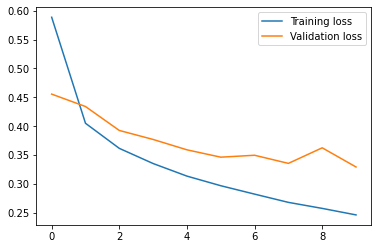

In [0]:
plt.plot(train_losses, label ='Training loss')
plt.plot(test_losses, label ='Validation loss')
plt.legend()

In [0]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64,10)

    self.dropout = nn.Dropout(p=0.2)

  def forward(self,x):
    x = x.view(x.shape[0], -1)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x))) 
    
    x = F.log_softmax(self.fc4(x), dim =1)

    return x

In [0]:
# validation part
model = Classifier()

criterian = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr =0.0003)


epochs =10 
step =0

train_losses, test_losses =[], []

for e in range(epochs):
  running_loss = 0 
  for images,labels in trainloader:
    images= images.view(images.shape[0], -1)
    optimizer.zero_grad()
    output = model.forward(images)
    loss = criterian(output, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    test_loss = 0 
    accuracy =0

    #turn off grad ofr validation
    with torch.no_grad():
      model.eval()
      for images, labels in testloader:
        log_ps =model(images)
        test_loss += criterian(log_ps, labels)

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim =1)

        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equal.type(torch.FloatTensor))

      model.train()
      train_losses.append(running_loss / len(trainloader))
      test_losses.append(test_loss / len(testloader))

      print("epoch :{} / {}..".format(e+1, epochs),
            "Training loss: {:.3f}..".format(running_loss/ len(trainloader)),
            "test_loss: {:.3f}..".format(test_loss/len(testloader)),
            "test accuracy: {:.3f}".format(accuracy/ len(testloader)))


      





epoch :1 / 10.. Training loss: 0.713.. test_loss: 0.466.. test accuracy: 0.062
epoch :2 / 10.. Training loss: 0.463.. test_loss: 0.424.. test accuracy: 0.062
epoch :3 / 10.. Training loss: 0.414.. test_loss: 0.402.. test accuracy: 0.062
epoch :4 / 10.. Training loss: 0.386.. test_loss: 0.384.. test accuracy: 0.062
epoch :5 / 10.. Training loss: 0.366.. test_loss: 0.378.. test accuracy: 0.062
epoch :6 / 10.. Training loss: 0.348.. test_loss: 0.354.. test accuracy: 0.062
epoch :7 / 10.. Training loss: 0.333.. test_loss: 0.352.. test accuracy: 0.062
epoch :8 / 10.. Training loss: 0.320.. test_loss: 0.354.. test accuracy: 0.062
epoch :9 / 10.. Training loss: 0.313.. test_loss: 0.342.. test accuracy: 0.062
epoch :10 / 10.. Training loss: 0.300.. test_loss: 0.346.. test accuracy: 0.062


In [0]:
import matplotlib.pyplot as plt

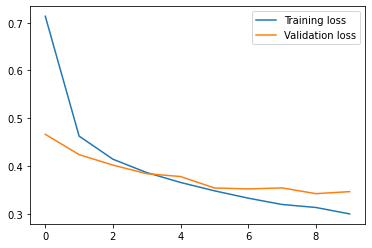

In [0]:
plt.plot(train_losses, label ='Training loss')
plt.plot(test_losses, label ='Validation loss')
plt.legend()

In [0]:
print("Our Model: \n\n", model, '\n')
print("The stae dict keys: \n \n", model.state_dict().keys())

Our Model: 

 Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 

The stae dict keys: 
 
 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


In [0]:
torch.save(model.state_dict(), 'checkpoint.pth')

In [0]:
#loading
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys)

<built-in method keys of collections.OrderedDict object at 0x7f26945bad90>


In [0]:
model.load_state_dict(state_dict)

<All keys matched successfully>